### 이상치 처리
#### 이상치(outlier)란 일부 관측치의 값이 전체 데이터의 범위에서 크게 벗어난 아주 작거나 큰 극단적인 값을 갖는 것
#### 전체 데이터의 양이 많을수록 튀는 값이 통곗값에 미치는 영향력이 줄어들어 이상치 제거의 필요성이 낮아진다.
#### 이상치는 해당 값을 결측값으로 대체한 다음 결측값 처리를 하거나, 아예 해당 이상치를 제거(trimming)하는 것이 가장 간단하다.
#### 이상치를 제거하면 추정치의 분산은 감소하지만 실젯값을 과장하여 편향을 발생시킨다. 이에 관측값 변경(value modification;하한 값과 상한 값을 결정한 후 하한값보다 작으면 하한값으로 대체하고 상한 값보다 크면 상한 값으로 대체) OR 가중치 조정(weight modification;이상치의 영향을 감소시키는 가중치를 준다)을 사용한다.
#### 평균은 이상치에 통계량이 민감하게 변하기 때문에, 이상치에 보다 강건한 중위수와 '중위수 절대 편차(MAD;Median Absolute Deviation)'를 사용하는 것이 좀 더 효과적이다.
#### 분석 도메인에 따라 이상치가 중요한 분석 요인일 수 있다.

In [1]:
# 필요한 패키지 설치
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['figure.dpi'] = 300

In [2]:
# 데이터 불러오기
df = pd.read_csv("C:/Users/qorud/OneDrive/바탕 화면/Github/Data Analysis Method/heart_2020_cleaned.csv")

# 데이터 샘플 확인
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# BMI 컬럼의 분포 확인

df['BMI'].describe()


count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

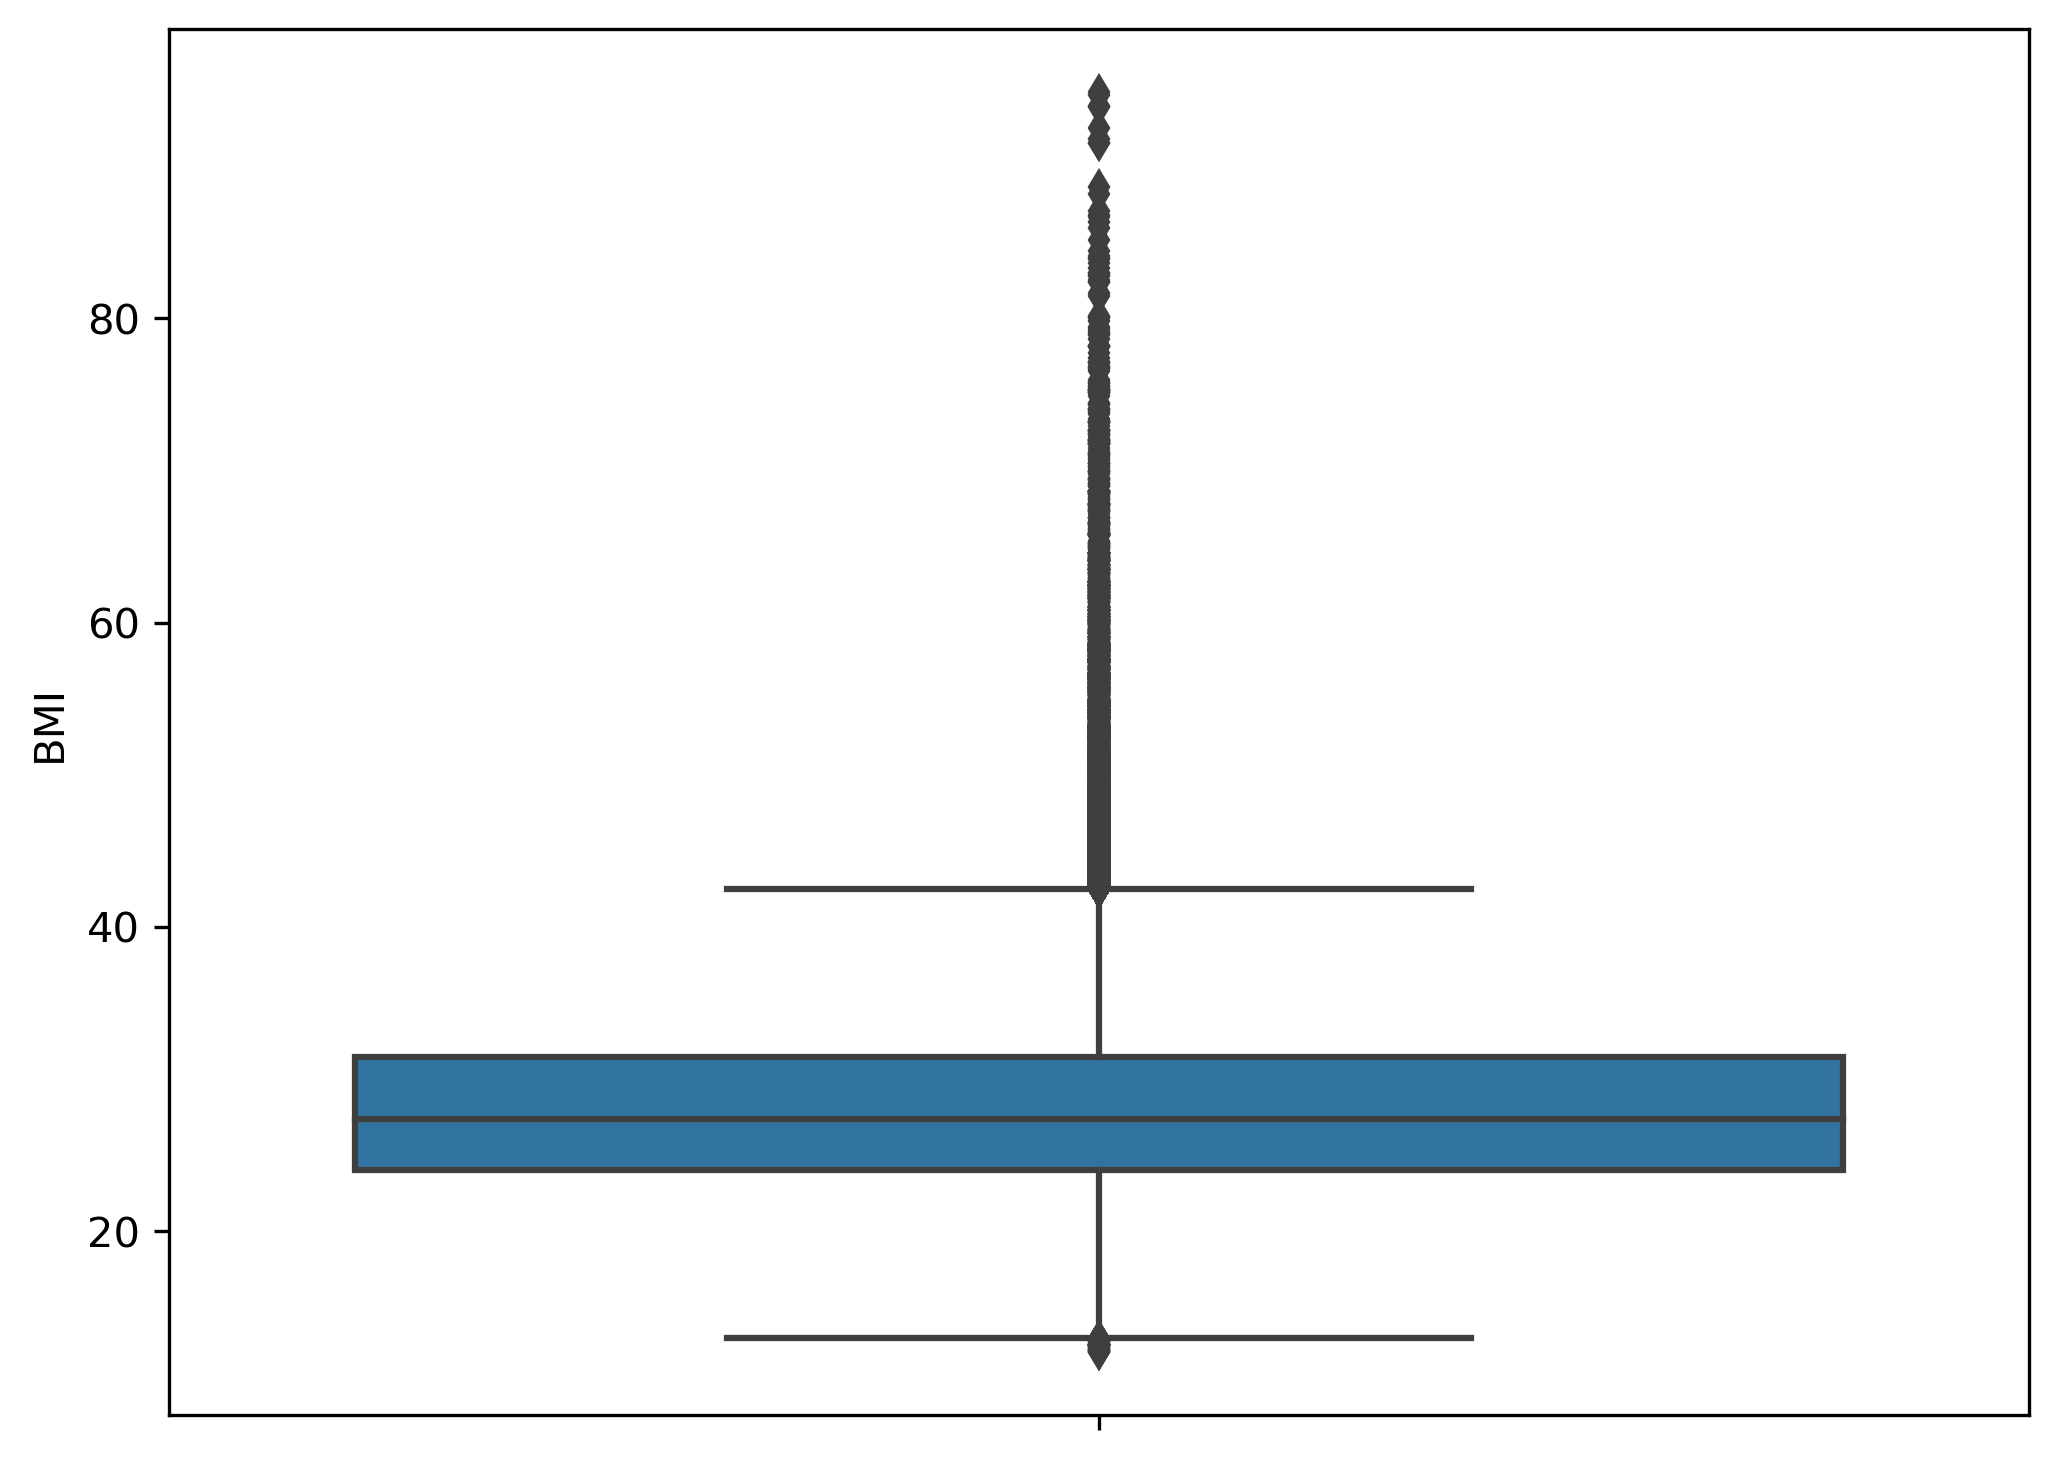

In [4]:
# BMI 컬럼의 박스플롯 시각화를 통한 이상치 확인

plt.figure(figsize = (8, 6))
sns.boxplot(y = 'BMI', data = df)
plt.show()
# 아래 표를 보면 3IQR을 넘어서는 관측치가 다수 있는 것으로 판단된다

In [5]:
# BMI 컬럼의 이상치 제거 (IQR*3)

# Q!, Q3 범위 정의
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1    #IQR 범위. 
rev_range = 3  # 제거 범위 조절 변수 설정

# 이상치 범위 설정
filter = (df['BMI'] >= Q1 - rev_range * IQR) & (df['BMI'] <= Q3 + rev_range *IQR)
df_rmv = df.loc[filter]
print(df['BMI'].describe())
print(df_rmv['BMI'].describe())

# 박스플롯의 이상치 기준인 IQR1.5는 정규분포로 환상했을 때 2.698σ와 동일하다. 
#그런데 실무 데이터에서는 분포가 더 넓은 편이기 때문에 IQR 3을 적용해준다
# 이는 약 5σ 정도로 이상치로 판단하기 충분한 기준이다.
# 최종 아웃풋에서 기존 칼럼의 최댓값 94.85가 53.59로 감소했으며 관측치는 1318개 제거 되었다.

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64
count    318477.000000
mean         28.193173
std           6.010014
min          12.020000
25%          24.020000
50%          27.320000
75%          31.320000
max          53.590000
Name: BMI, dtype: float64


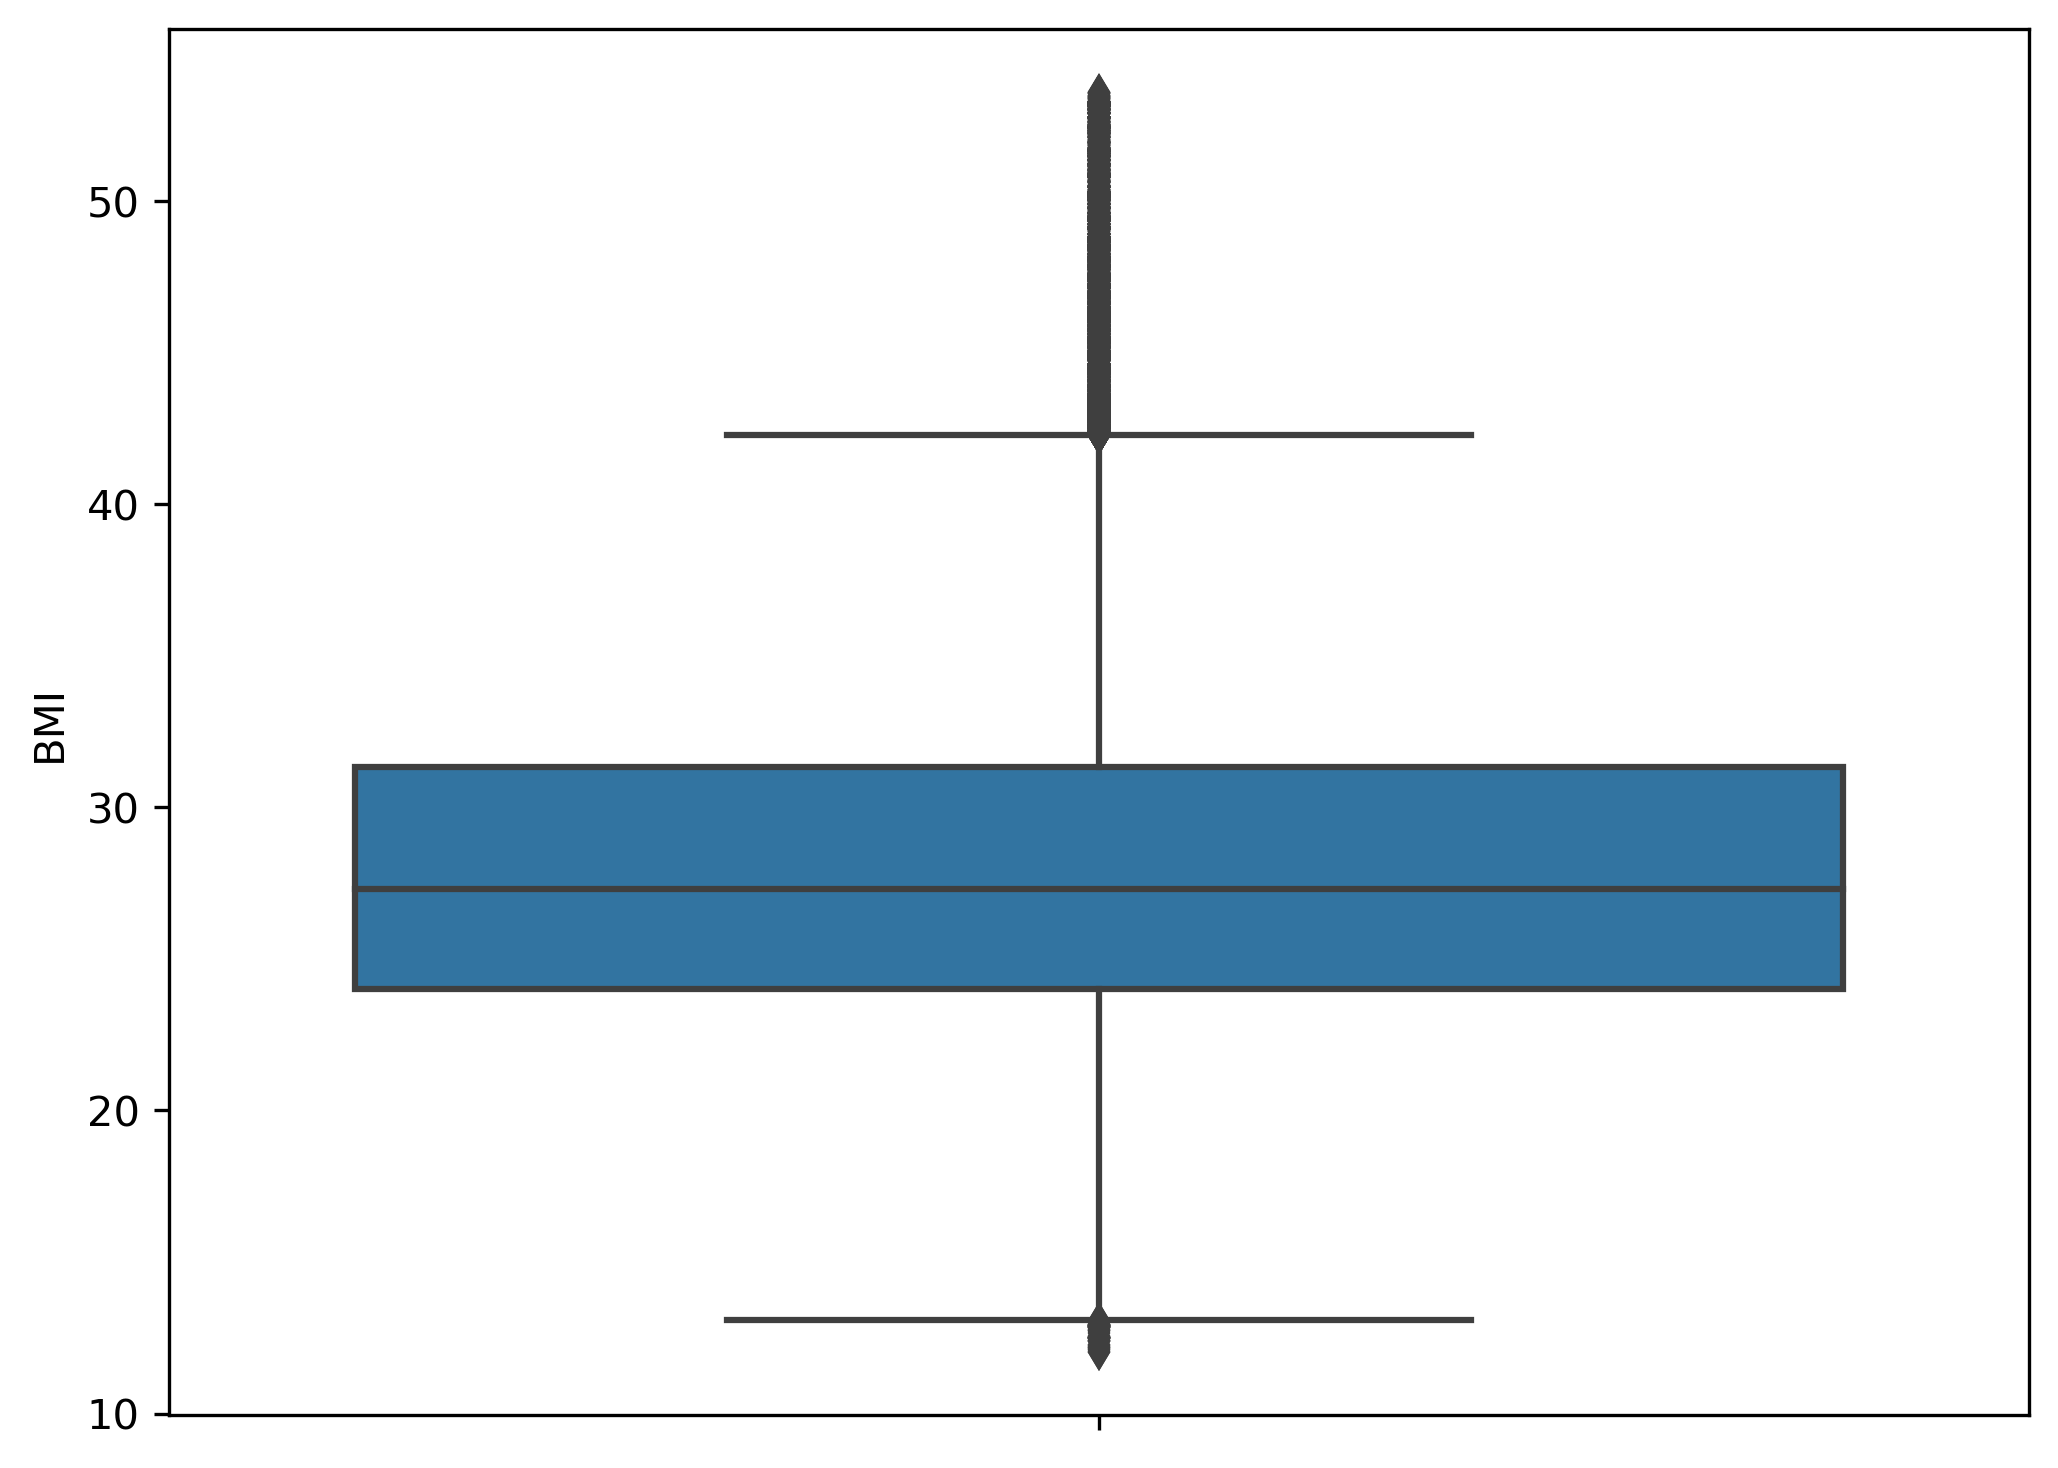

In [6]:
# 이상치 제거 후 박스플롯 시각화

plt.figure(figsize = (8, 6))
sns.boxplot(y = 'BMI', data = df_rmv)
plt.show()

# 아래 결과와 같이 이상치가 많이 줄어든 것을 확인할 수 있다.

In [ ]:
# 이상치 IQR*3 값으로 대치

# 이상치 대치 함수 설정
def replace_outlier(value):
    Q1 = df['BMI'].quantile(0.25)
    Q3 = df['BMI'].quantile(0.75)
    IQR = Q3 - Q1    #IQR 범위. 
    rev_range = 3  # 제거 범위 조절 변수 설정

    if ((value < (Q1 - rev_range * IQR))): 
        value = Q1 - rev_range * IQR
    if ((value > (Q3 + rev_range * IQR))): 
        value = Q3 + rev_range * IQR
#         value = df['BMI'].median() # 중앙값 대치
    return value
df['BMI'] = df['BMI'].apply(replace_outlier)

print(df['BMI'].describe())

# 다음으로 이상치를 상하한선 값으로 대치한다. 상황에 따라서 평균이나 중앙값 등으로 대치해 줄 수 있다. 
# 앞의 이상치 제거 방법처럼 기준을 정의하고 if문을 사용하여 해당 관측치의 값이 이상치 기준을 넘어서면 상하한선으로 대치되도록 해준다.
# 아우풋을 확인해보면 전체 관측치의 수가 그대로 유지되며 최댓값이 53.59로 조정됐다.

In [ ]:
# 이상치 대치 후 박스플롯 시각화

plt.figure(figsize = (8, 6))
sns.boxplot(y = 'BMI', data = df)
plt.show()
# 이상치 대치 후에도 이상치 제거 방법과 같이 이상치 수준이 감소한것을 확인할 수 있다.